In [26]:
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
import sys

# Set the root directory to Sorrento Home path
root_path = Path.cwd().parents[0]
sys.path.append(str(root_path))

from scripts.env import get_n_value
n_val = (get_n_value(root_path))

In [154]:
train_1 = pd.read_parquet(f"../Processed_{n_val}/z8j7xjz3z3/esp_test_4.parquet")
# Downsample the data to 1 minute intervals with linear interpolation
train_1 = train_1.resample('1min').interpolate(method='linear').map(lambda x: round(x, 4))
print(f"The data frequency is {train_1.index.freq}")

The data frequency is <Minute>


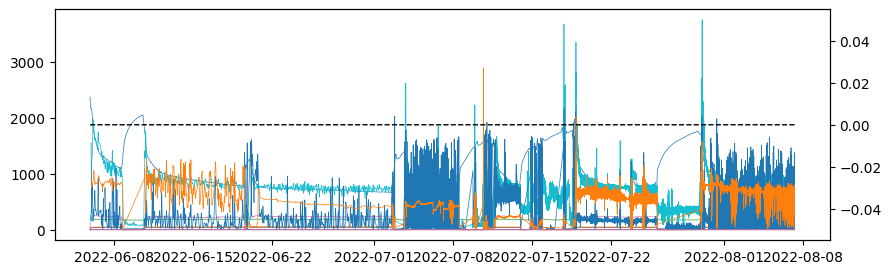

In [155]:
fig,ax = plt.subplots(figsize=(10,3))
lw = 0.5
ax.plot(train_1.index,train_1.pump_intake_pressure,lw=lw)
ax.plot(train_1.index,train_1.motor_frequency,lw=lw)
ax.plot(train_1.index,train_1.motor_temp,lw=lw)
ax.plot(train_1.index,train_1.x_vibration,lw=lw)
ax.plot(train_1.index,train_1.y_vibration,lw=lw)
ax.plot(train_1.index,train_1.motor_amps_phase_b,lw=lw)
ax.plot(train_1.index,train_1.output_amps_phase_b,lw=lw)
ax.plot(train_1.index,train_1.casing_pressure,lw=lw)
ax.plot(train_1.index,train_1.tubing_pressure,lw=lw)
ax.plot(train_1.index,train_1.gas_rate,lw=lw)
ax.plot(train_1.index,train_1.oil_rate,lw=lw)
ax.plot(train_1.index,train_1.water_rate,lw=lw)
ax = ax.twinx()
ax.plot(train_1.index,train_1.Label,c="k",ls="--",lw=lw+0.5)
plt.show()